### Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading in the data

In [2]:
df = pd.read_csv(r"C:\Users\USER\Downloads\supermarket_sales.csv")

In [3]:
# Checking for missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [4]:
# Checking for data types and anomalies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Exploratory Data Analysis

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


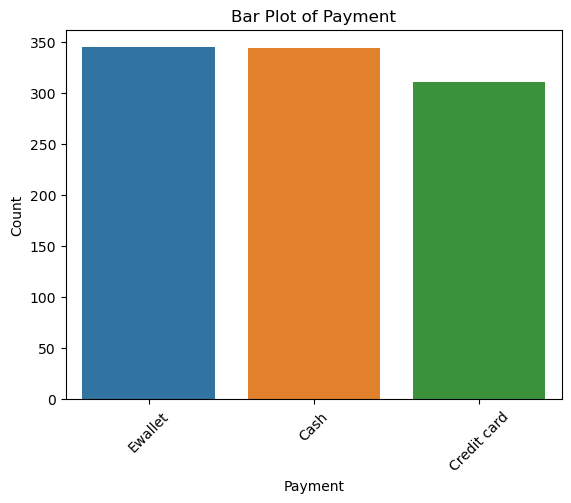

In [6]:
sns.countplot(data=df, x='Payment')
plt.xlabel('Payment')
plt.ylabel('Count')
plt.title('Bar Plot of Payment')
plt.xticks(rotation=45)
plt.show()

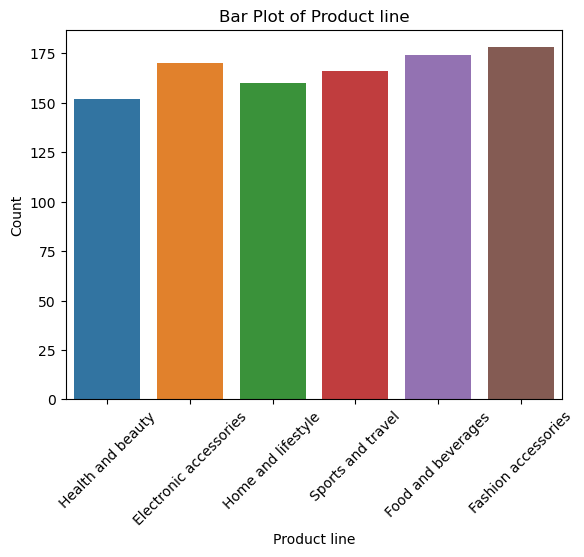

In [7]:
sns.countplot(data=df, x='Product line')
plt.xlabel('Product line')
plt.ylabel('Count')
plt.title('Bar Plot of Product line')
plt.xticks(rotation=45)
plt.show()

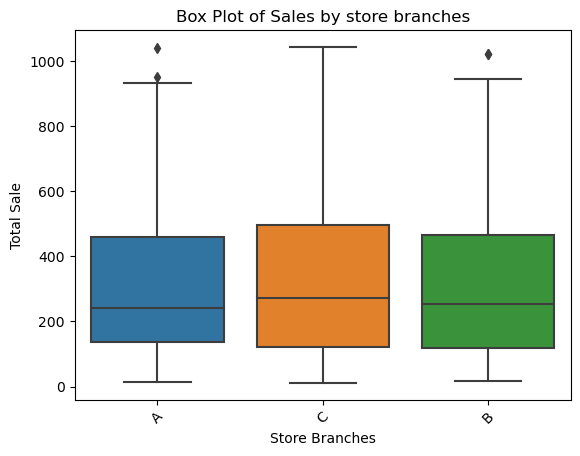

In [8]:
sns.boxplot(data=df, x='Branch', y='Total')
plt.xlabel('Store Branches')
plt.ylabel('Total Sale')
plt.title('Box Plot of Sales by store branches')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


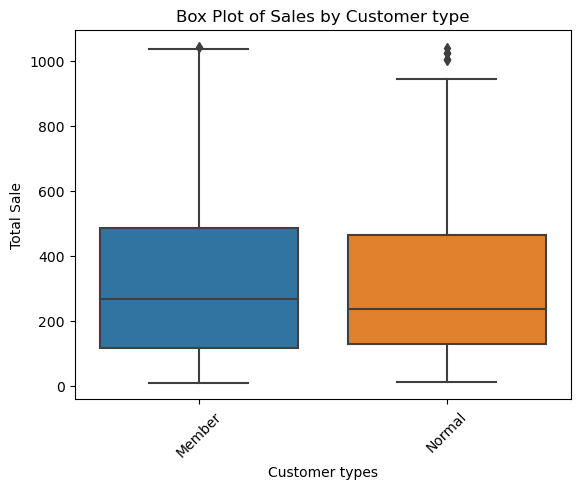

In [9]:
sns.boxplot(data=df, x='Customer type', y='Total')
plt.xlabel('Customer types')
plt.ylabel('Total Sale')
plt.title('Box Plot of Sales by Customer type')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

### Sales Performance Analysis

#### Analyzing total sales and gross income trends over the three-month period to identify peak and off-peak seasons
* Convert the "Date" column to a proper datetime data type
* Group the data by date and calculate total sales and gross income for each day
* Resample the data to a suitable time frequency (daily) and calculate the sum or mean of sales and income for that frequency.

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Total'].sum()
daily_income = df.groupby('Date')['gross income'].sum()

daily_sales = daily_sales.resample('D').sum()
daily_income = daily_income.resample('D').sum()

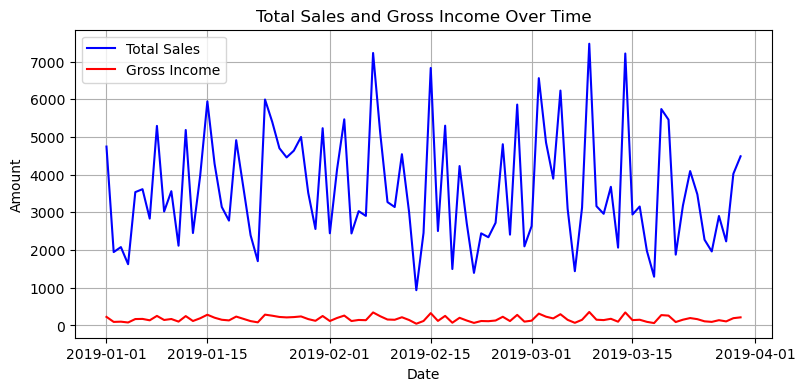

In [11]:
plt.figure(figsize=(9, 4))

# Plot total sales
plt.plot(daily_sales.index, daily_sales.values, label='Total Sales', color='blue')

# Plot gross income
plt.plot(daily_income.index, daily_income.values, label='Gross Income', color='red')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Total Sales and Gross Income Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Branch Comparison

#### Checking how the three branches (A, B, and C) compare in terms of sales and customer satisfaction
* Group the data by branch and calculate total sales and customer satisfaction.
* Create bar plots on total sales and customer satisfaction across the three branches.

In [12]:
branch_sales = df.groupby('Branch')['Total'].sum()
branch_satisfaction = df.groupby('Branch')['Rating'].mean()

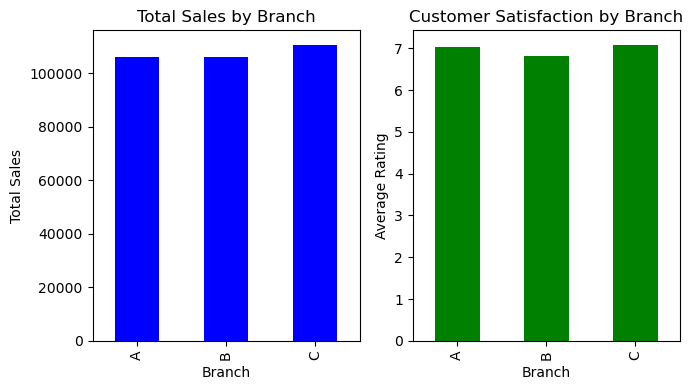

In [13]:
plt.figure(figsize=(7, 4))

# Bar plot for total sales
plt.subplot(1, 2, 1)
branch_sales.plot(kind='bar', color='blue')
plt.title('Total Sales by Branch')
plt.ylabel('Total Sales')

# Bar plot for customer satisfaction
plt.subplot(1, 2, 2)
branch_satisfaction.plot(kind='bar', color='green')
plt.title('Customer Satisfaction by Branch')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

### Payment Analysis

#### Finding out the preferred payment methods for customers
* Group the data by payment method and calculate the percentage
* Create a pie chart to visualize the distribution of payment methods preferred by customers.

In [14]:
payment_preferences = df['Payment'].value_counts(normalize=True) * 100

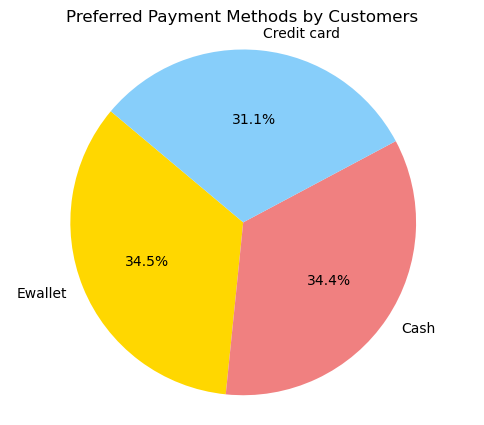

In [15]:
plt.figure(figsize=(6, 5))

# A pie chart for payment preferences
colors = ['gold', 'lightcoral', 'lightskyblue']
plt.pie(payment_preferences, labels=payment_preferences.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Preferred Payment Methods by Customers')

plt.axis('equal')

plt.show()

#### Finding out number of transactions by payment method
* Calculate the number of transactions for each payment method
* Create a bar plot to visualize the number of transactions for each payment method

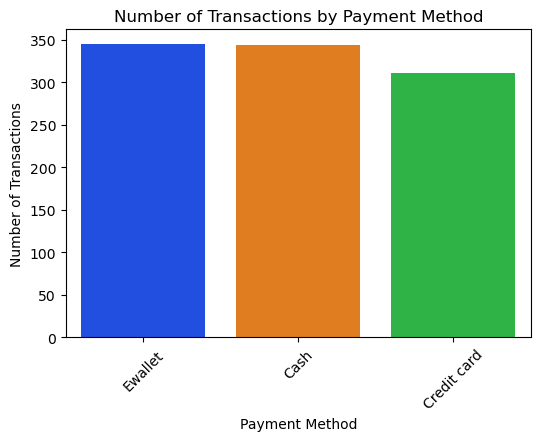

In [16]:
payment_counts = df['Payment'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="bright")

plt.title('Number of Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')

plt.xticks(rotation=45)

plt.show()

### Product Line Analysis

#### Finding out if there are certain product lines that are more popular than others, and if there is a gender or membership-related bias.
* Calculate the frequency or percentage of each product line
* Calculate product line distribution by gender
* Calculate product line distribution by customer type
* Create a bar chart for product line distribution by gender and membership

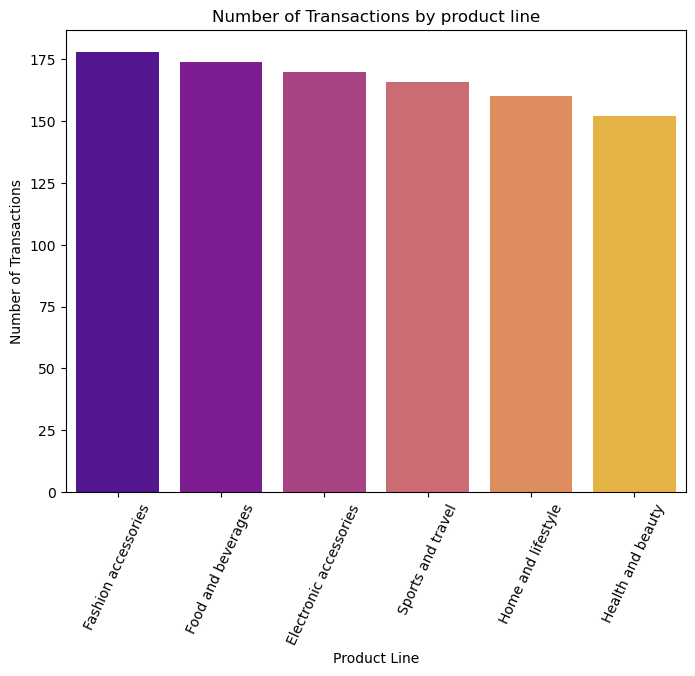

In [17]:
product_line_popularity = df['Product line'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=product_line_popularity.index, y=product_line_popularity.values, palette="plasma")

plt.title('Number of Transactions by product line')
plt.xlabel('Product Line')
plt.ylabel('Number of Transactions')

plt.xticks(rotation=65)

plt.show()

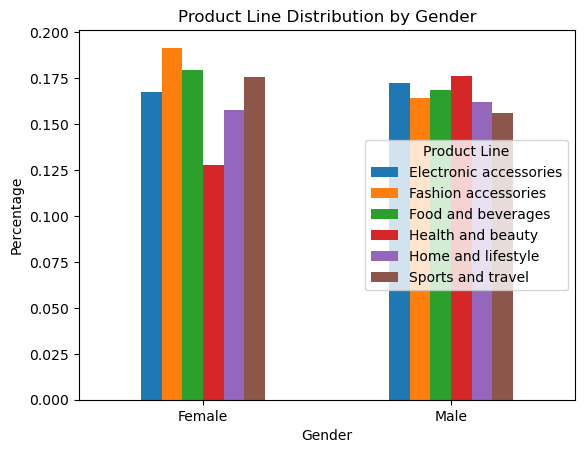

In [18]:
product_line_by_gender = df.groupby('Gender')['Product line'].value_counts(normalize=True).unstack()
product_line_by_gender.plot(kind='bar')
plt.title('Product Line Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Product Line', loc='right')

plt.show()

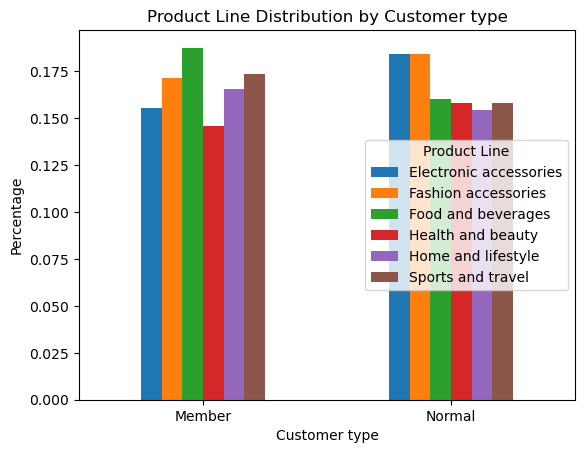

In [19]:
product_line_by_Customer_type = df.groupby('Customer type')['Product line'].value_counts(normalize=True).unstack()
product_line_by_Customer_type.plot(kind='bar')
plt.title('Product Line Distribution by Customer type')
plt.xlabel('Customer type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Product Line', loc='right')

plt.show()

### Time of Day Analysis

#### How does the time of day affect sales and customer ratings?
* Convert the 'Time' column to a datetime data type
* Extract the hour from the time
* Group the data by the hour of the day and calculate aggregate statistics

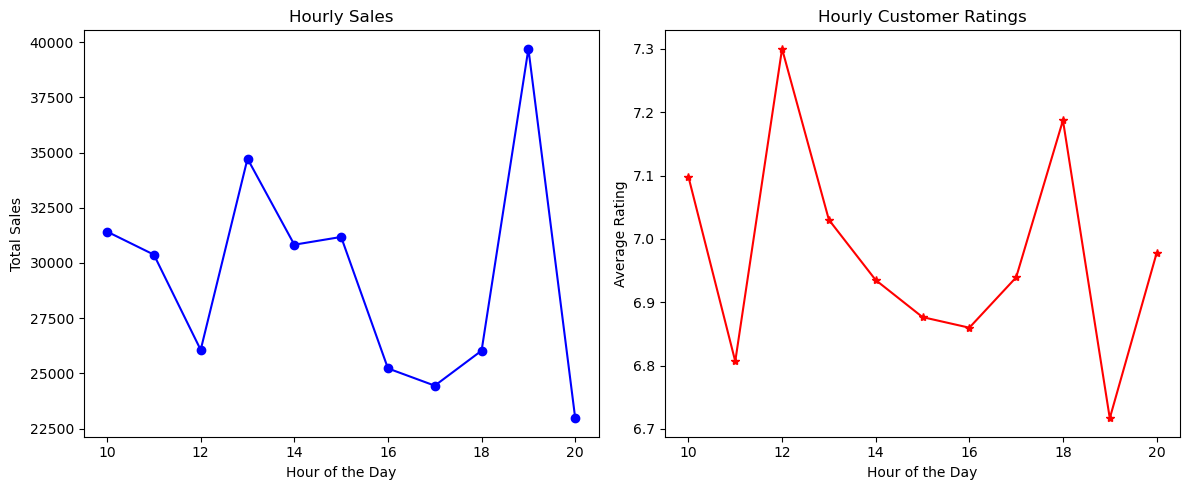

In [20]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
hourly_sales = df.groupby('Hour')['Total'].sum()
hourly_ratings = df.groupby('Hour')['Rating'].mean()

plt.figure(figsize=(12, 5))

# Line plot for hourly sales
plt.subplot(1, 2, 1)
hourly_sales.plot(kind='line', color='blue', marker='o')
plt.title('Hourly Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')

# Line plot for hourly customer ratings
plt.subplot(1, 2, 2)
hourly_ratings.plot(kind='line', color='red', marker='*')
plt.title('Hourly Customer Ratings')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

#### Calculate and visualize hourly sales and ratings for each branch to gain more insights.

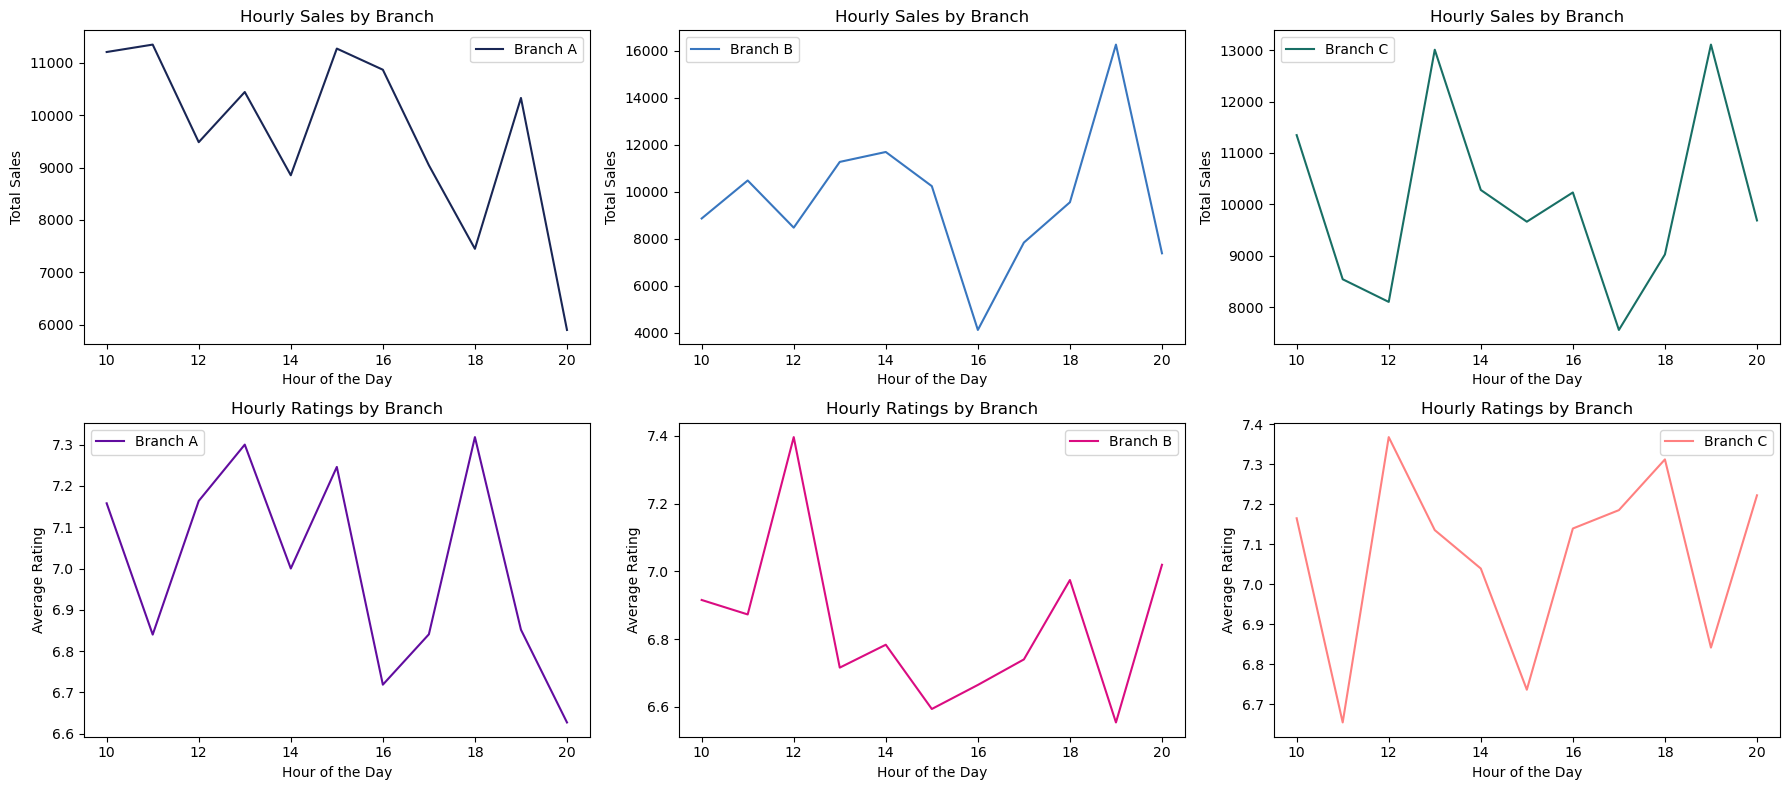

In [21]:
# Separate DataFrames for each branch
branch_a_df = df[df['Branch'] == 'A']
branch_b_df = df[df['Branch'] == 'B']
branch_c_df = df[df['Branch'] == 'C']

# Hourly sales for each branch
hourly_sales_branch_a = branch_a_df.groupby('Hour')['Total'].sum()
hourly_sales_branch_b = branch_b_df.groupby('Hour')['Total'].sum()
hourly_sales_branch_c = branch_c_df.groupby('Hour')['Total'].sum()

# Hourly ratings for each branch
hourly_ratings_branch_a = branch_a_df.groupby('Hour')['Rating'].mean()
hourly_ratings_branch_b = branch_b_df.groupby('Hour')['Rating'].mean()
hourly_ratings_branch_c = branch_c_df.groupby('Hour')['Rating'].mean()

# Subplots for hourly sales and ratings by branch
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))

# Hourly Sales
axes[0, 0].plot(hourly_sales_branch_a.index, hourly_sales_branch_a.values, label='Branch A', color='#192655')
axes[0, 1].plot(hourly_sales_branch_b.index, hourly_sales_branch_b.values, label='Branch B', color='#3876BF')
axes[0, 2].plot(hourly_sales_branch_c.index, hourly_sales_branch_c.values, label='Branch C', color='#186F65')

for ax in axes[0]:
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Total Sales')
    ax.legend()
    ax.set_title('Hourly Sales by Branch')

# Hourly Ratings
axes[1, 0].plot(hourly_ratings_branch_a.index, hourly_ratings_branch_a.values, label='Branch A', color='#610C9F')
axes[1, 1].plot(hourly_ratings_branch_b.index, hourly_ratings_branch_b.values, label='Branch B', color='#DA0C81')
axes[1, 2].plot(hourly_ratings_branch_c.index, hourly_ratings_branch_c.values, label='Branch C', color='#FF8080')

for ax in axes[1]:
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Average Rating')
    ax.legend()
    ax.set_title('Hourly Ratings by Branch')

plt.tight_layout()
plt.show()